The goal of this project is to create a model that predicts computer prices

## Importing libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as ltb

In [55]:
laptops = pd.read_csv('laptop_data.csv')
laptops.head()
#Loading and displaying the dataset

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## EDA

In [56]:
laptops.columns
#dropping columns that are not needed

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [57]:
laptops.drop(['Unnamed: 0'], axis=1, inplace=True)

In [58]:
laptops.shape

(1303, 11)

In [59]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [60]:
laptops.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


### Ram

In [61]:
laptops['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [62]:
laptops['Ram'] = laptops['Ram'].str.replace('GB', '')
#Removing GB from Ram column

In [63]:
laptops['Ram'] = laptops['Ram'].astype(int)
laptops.dtypes
#Changing the type of Ram to integer

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

### Weight

In [64]:
laptops['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [65]:
laptops['Weight'] = laptops['Weight'].str.replace('kg', '')
#Removing 'kg'

In [66]:
laptops['Weight'] = laptops['Weight'].astype(float)
#Changing type
laptops.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

### Screen Resolution

In [67]:
laptops['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [68]:
laptops['Touchscreen'] = laptops['ScreenResolution'].str.contains('Touchscreen')
laptops['Full HD'] = laptops['ScreenResolution'].str.contains('Full HD')
laptops['4K'] = laptops['ScreenResolution'].str.contains('4K Ultra HD')
laptops['IPS panel'] = laptops['ScreenResolution'].str.contains('IPS Panel')
laptops['Quad HD'] = laptops['ScreenResolution'].str.contains('Quad HD')
#creating columns to show what type of screen given laptop has

In [69]:
#Removing the screen names from ScreenResolution and leaving only resolution
laptops['ScreenResolution'] = laptops['ScreenResolution'].apply(lambda x: x.split(' ')[-1])

In [70]:
#Dividing ScreenResolution into width and length columns
laptops['Screen_x'] = laptops['ScreenResolution'].str.split('x').str[0].astype(int)
laptops['Screen_y'] = laptops['ScreenResolution'].str.split('x').str[1].astype(int)

In [71]:
laptops.drop(['ScreenResolution'], axis=1, inplace=True)
#Dropping 'ScreenResolution' because it isn't needed anymore

### Memory

In [72]:
laptops['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [73]:
laptops['Memory'] = laptops['Memory'].str.replace('\.0','', regex=True)
# Removing '.0' from rows with TB values

laptops['Memory'] = laptops['Memory'].str.replace('GB','')
laptops['Memory'] = laptops['Memory'].str.replace('TB','000')
# Removing 'GB' and replacing 'TB' with '000' to keep the same measures

In [74]:
laptops['Memory'] = laptops['Memory'].apply(lambda x: x.split()[:2])
# Leaving only primary memory disks in th dataframe

In [75]:
laptops['HDD'] = laptops['Memory'].apply(lambda x: x[0] if 'HDD' in x else '0')
laptops['SSD'] = laptops['Memory'].apply(lambda x: x[0] if 'SSD' in x else '0')
# Applying SSD or HDD memory to particular columns

laptops.drop(['Memory'], axis=1, inplace=True)
# Dropping 'Memory' column because it isn't useful anymore

In [76]:
laptops['HDD'] = laptops['HDD'].astype(int)
laptops['SSD'] = laptops['SSD'].astype(int)
# Changing type of 'HDD' and 'SSD' columns to integer

### CPU

In [77]:
laptops['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [78]:
laptops['Cpu'] = laptops['Cpu'].apply(lambda x: x.rsplit(' ', 1)[0])
# Removing GHz from CPUs

laptops['Cpu'] = laptops['Cpu'].apply(lambda x: x.split(' ')[:3] if 'Intel' in x
                                      else (x.split(' ')[:2] if 'AMD' in x else x))
# Leaving only the first few keywords in CPU column

laptops['Cpu'] = laptops['Cpu'].apply(lambda x: ' '.join(x))
# Joining the strings in the rows together

In [79]:
laptops.Cpu = laptops.Cpu.apply(lambda x: x.strip())
num_of_cpu = laptops['Cpu'].value_counts(ascending=False)
num_of_cpu
# Checking how many counts of different CPUs there is

Intel Core i7                                  527
Intel Core i5                                  423
Intel Core i3                                  136
Intel Celeron Dual                              80
Intel Pentium Quad                              27
Intel Core M                                    19
AMD A9-Series                                   17
AMD A6-Series                                   11
AMD E-Series                                     9
Intel Celeron Quad                               8
AMD A12-Series                                   8
AMD A10-Series                                   6
Intel Atom x5-Z8350                              5
AMD A8-Series                                    4
Intel Atom x5-Z8550                              4
AMD Ryzen                                        4
Intel Pentium Dual                               3
Intel Xeon E3-1505M                              2
AMD FX                                           2
Intel Xeon E3-1535M            

In [80]:
num_of_cpu_less_10 = num_of_cpu[num_of_cpu<=10]

laptops.Cpu = laptops.Cpu.apply(lambda x: 'other' if x in num_of_cpu_less_10 else x)
len(laptops.Cpu.unique())
# Classifying CPUs that appear in the dataset less than 10 times as 'other'

9

### OpSys

In [81]:
laptops.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [82]:
windows_list = ['Windows 10', 'Windows 7', 'Windows 10 S']
mac_list = ['macOS', 'Mac OS X']
other = ['No OS', 'Linux', 'Chrome OS', 'Android']

laptops['OpSys'] = ['Windows' if x in windows_list else 'mac' if x in mac_list else 'Other' for x in laptops['OpSys']]
# Changing values in 'OpSys' to 'mac' for OS of Apple, 'Windows' for all versions of Windows
# and 'other' for other OS

In [83]:
laptops['OpSys'].value_counts()

Windows    1125
Other       157
mac          21
Name: OpSys, dtype: int64

## Data Visualization

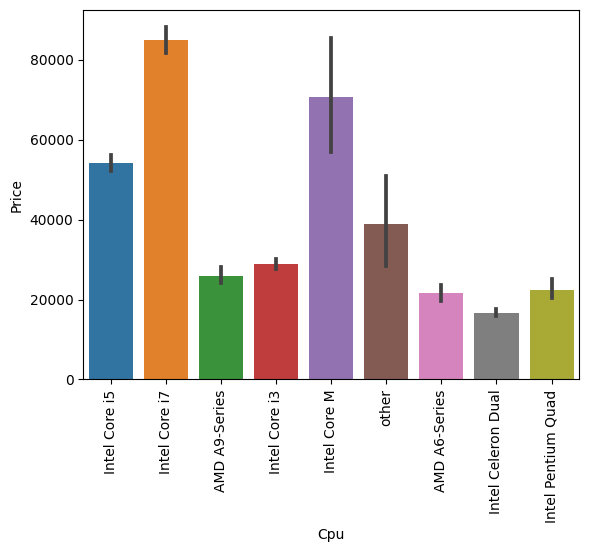

In [84]:
#Checking what CPUs cost the most
ax = sns.barplot(data=laptops, x='Cpu', y='Price')
ax.tick_params(axis='x', rotation=90)

The most expensive Cpu is Intel Core i7 followed by Intel Core M

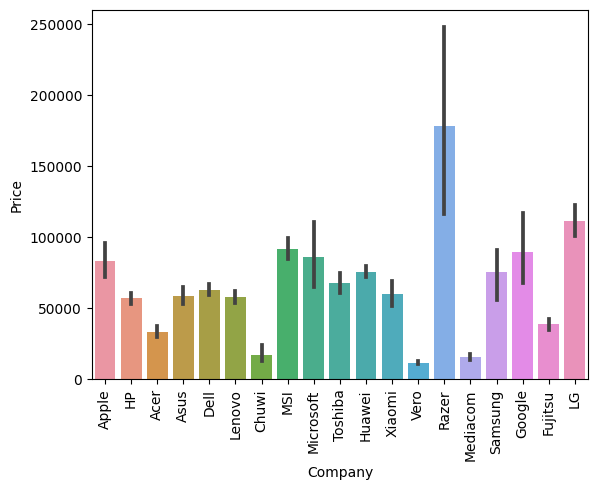

In [85]:
ax1 = sns.barplot(data=laptops, x='Company', y='Price')
ax1.tick_params(axis='x', rotation=90)

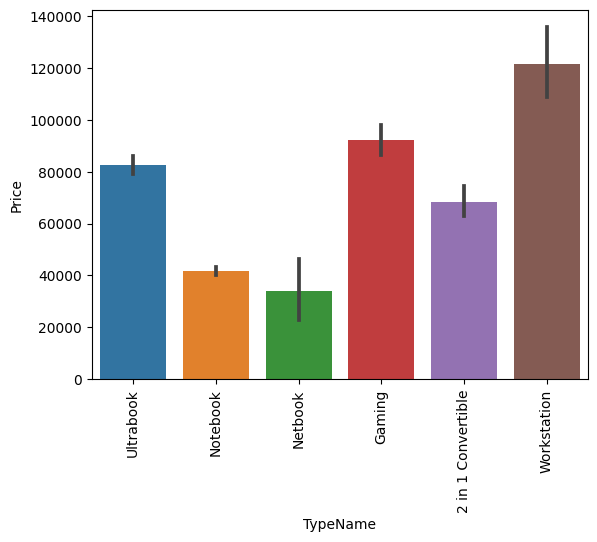

In [86]:
ax = sns.barplot(data=laptops, x='TypeName', y='Price')
ax.tick_params(axis='x', rotation=90)

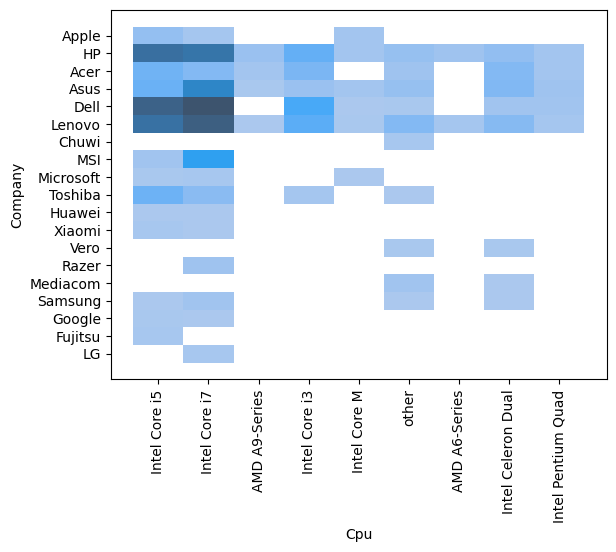

In [87]:
ax = sns.histplot(data=laptops, x='Cpu', y='Company')
ax.tick_params(axis='x', rotation=90)

<ipython-input-88-702af1b858dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(laptops.corr(), cmap='YlGnBu', annot=True)


<Axes: >

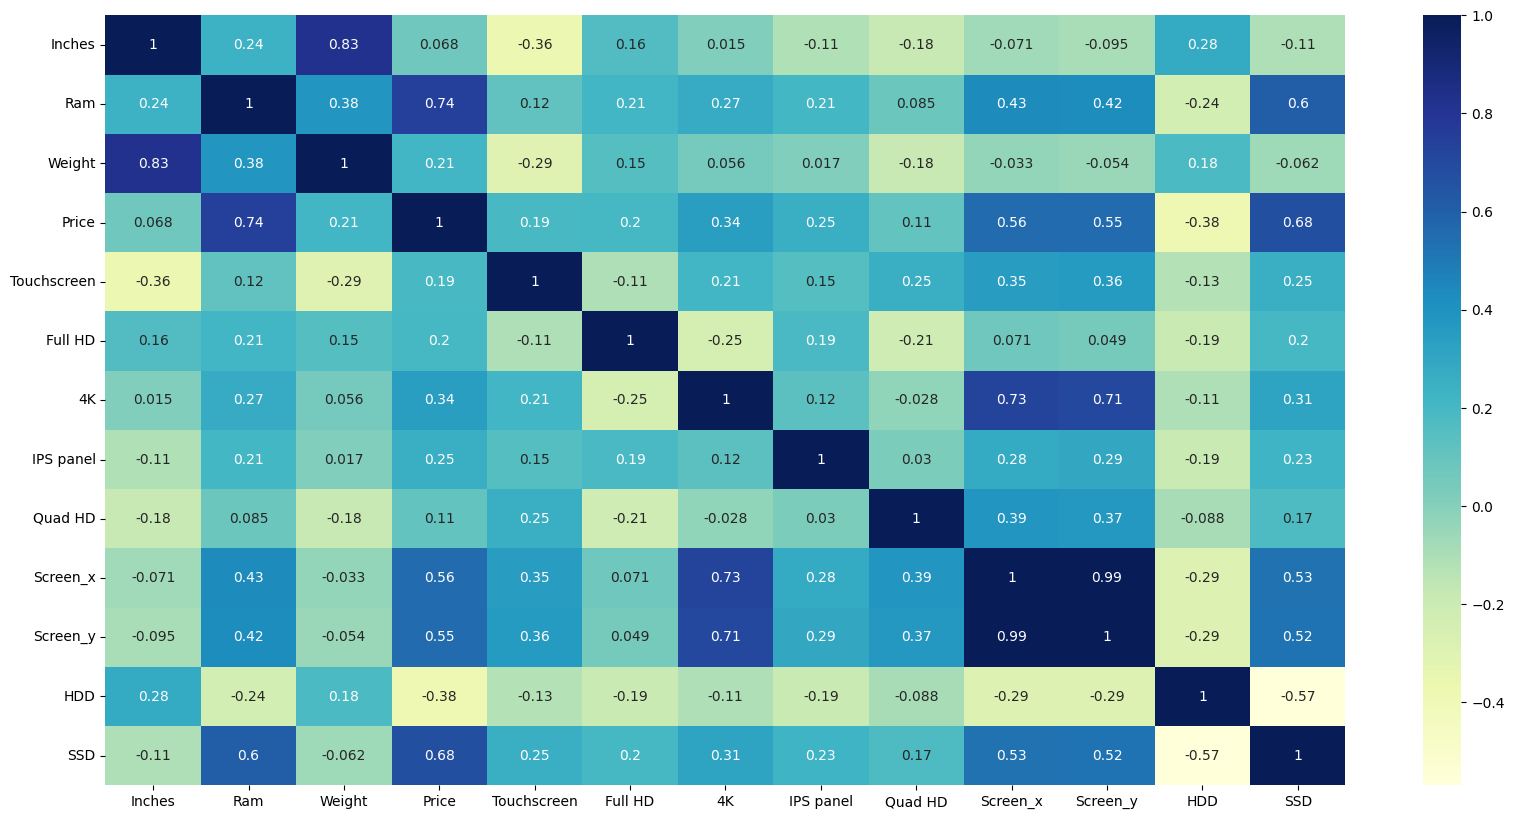

In [88]:
fig = plt.figure(figsize=(20, 10))
sns.heatmap(laptops.corr(), cmap='YlGnBu', annot=True)

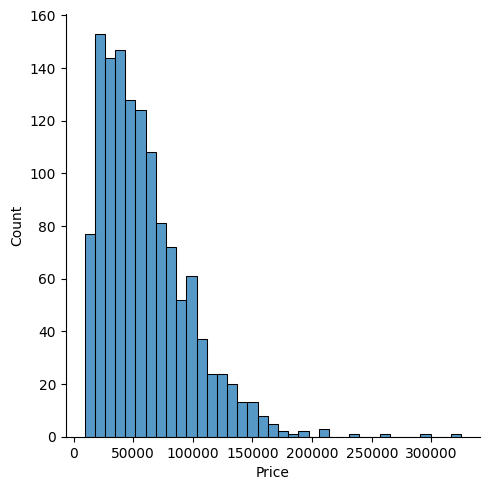

In [89]:
sns.displot(laptops['Price'])
#It can be seen that distribution is right-skewed

<ipython-input-90-57200aef8ada>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(laptops['Price']))


<Axes: xlabel='Price', ylabel='Density'>

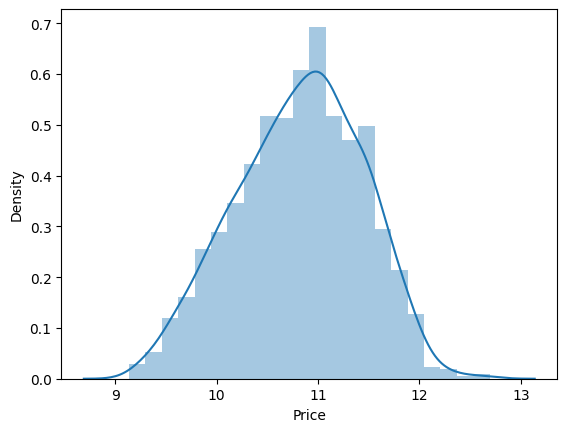

In [90]:
sns.displot(np.log(laptops['Price']))
#Using np.log to obtain more normally distributed price

## Encoding categorical variables

In [91]:
laptops.dtypes

Company         object
TypeName        object
Inches         float64
Cpu             object
Ram              int64
Gpu             object
OpSys           object
Weight         float64
Price          float64
Touchscreen       bool
Full HD           bool
4K                bool
IPS panel         bool
Quad HD           bool
Screen_x         int64
Screen_y         int64
HDD              int64
SSD              int64
dtype: object

In [92]:
le = LabelEncoder()

laptops['Company'] = le.fit_transform(laptops['Company'])
laptops['TypeName'] = le.fit_transform(laptops['TypeName'])
laptops['Cpu'] = le.fit_transform(laptops['Cpu'])
laptops['Gpu'] = le.fit_transform(laptops['Gpu'])
laptops['OpSys'] = le.fit_transform(laptops['OpSys'])
laptops['Touchscreen'] = le.fit_transform(laptops['Touchscreen'])
laptops['Full HD'] = le.fit_transform(laptops['Full HD'])
laptops['4K'] = le.fit_transform(laptops['4K'])
laptops['IPS panel'] = le.fit_transform(laptops['IPS panel'])
laptops['Quad HD'] = le.fit_transform(laptops['Quad HD'])

In [93]:
laptops.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Full HD,4K,IPS panel,Quad HD,Screen_x,Screen_y,HDD,SSD
0,1,4,13.3,5,8,58,2,1.37,71378.6832,0,0,0,1,0,2560,1600,0,128
1,1,4,13.3,5,8,51,2,1.34,47895.5232,0,0,0,0,0,1440,900,0,0
2,7,3,15.6,5,8,53,0,1.86,30636.0000,0,1,0,0,0,1920,1080,0,256
3,1,4,15.4,6,16,9,2,1.83,135195.3360,0,0,0,1,0,2880,1800,0,512
4,1,4,13.3,5,8,59,2,1.37,96095.8080,0,0,0,1,0,2560,1600,0,256


## Building model

In [94]:
X= laptops.drop(['Price'], axis=1)
y=np.log(laptops['Price'])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
X_train.shape, X_test.shape, y_train.shape

((1042, 17), (261, 17), (1042,))

In [97]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
r2_lr = r2_score(y_test, lr_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test,lr_pred))

print('R2 for linear regression is: ' +str(r2_lr))
print('RMSE for linear regression is: ' + str(rmse_lr))

R2 for linear regression is: 0.7192240267656691
RMSE for linear regression is: 0.32813304013239736


## Ridge Regression

In [98]:
ridge_params = {'alpha': [0.01, 0.001, 0.0001, 0.00001, 0.000001]}
# Defining parameters for ridge regression
ridge = Ridge(alpha=0.00000001)


ridge_gs = GridSearchCV(estimator = ridge, param_grid = ridge_params, scoring = 'neg_mean_squared_error')
ridge_gs.fit(X_train, y_train)

print(ridge_gs.best_params_)

{'alpha': 1e-06}


In [99]:
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
r2_ridge = r2_score(y_test, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))

print('R2 for ridge regression is: ' +str(r2_ridge))
print('RMSE for ridge regression is: ' + str(rmse_ridge))

R2 for ridge regression is: 0.7192240267488638
RMSE for ridge regression is: 0.3281330401422172


## Lasso Regression

In [100]:
lasso_params = {'alpha': [0.01, 0.001, 0.0001, 0.00001, 0.000001]}
lasso = Lasso(alpha=0.000001)

lasso_gs = GridSearchCV(estimator = lasso, param_grid = lasso_params, scoring = 'neg_mean_squared_error')
lasso_gs.fit(X_train, y_train)

print(lasso_gs.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.567e+00, tolerance: 3.255e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+01, tolerance: 3.232e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.346e+00, tolerance: 3.236e

{'alpha': 1e-06}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.557e+01, tolerance: 3.229e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.213e+01, tolerance: 3.186e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.632e+01, tolerance: 3.232e

In [101]:
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
r2_lasso = r2_score(y_test, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_pred))

print('R2 for lasso regression is: ' +str(r2_lasso))
print('RMSE for lasso regression is: ' + str(rmse_lasso))

R2 for lasso regression is: 0.7192238824245751
RMSE for lasso regression is: 0.3281331244755755


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.610e+01, tolerance: 4.036e-02
  model = cd_fast.enet_coordinate_descent(


## Decision Tree Regressor

In [109]:
tree_params = {'max_depth': [14, 15, 16, 17, 18],
               'min_samples_split': [2, 3, 4, 5, 6],
               'min_samples_leaf': [2, 3, 4, 5]}

tree = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 3, min_samples_split = 2, random_state=0)

tree_gs = GridSearchCV(estimator=tree, param_grid=tree_params, scoring = 'neg_mean_squared_error')
tree_gs.fit(X_train, y_train)
print(tree_gs.best_params_)

{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [103]:
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
r2_tree = r2_score(y_test, tree_pred)
rmse_tree = np.sqrt(mean_squared_error(y_test, tree_pred))

print('R2 for Decision Tree regression is: ' +str(r2_tree))
print('RMSE for Decision Tree regression is: ' + str(rmse_tree))

R2 for Decision Tree regression is: 0.8424774008517789
RMSE for Decision Tree regression is: 0.24577710601181413


## Random Forest Regression

In [110]:
# Using RandomizedSearchCV to narrow down possibilites of GridSearchCV
RF_random = {'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 70, 90, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 600, 1000, 1400, 1800]}

RF = RandomForestRegressor()

RF_random = RandomizedSearchCV(estimator = RF, param_distributions = RF_random, n_iter = 50, cv = 2, random_state=42, n_jobs = -1)
# Fitting the random search model
RF_random.fit(X_train, y_train)
print(RF_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 90, 'bootstrap': True}


In [111]:
RF_params = {'bootstrap': [True],
 'max_depth': [90, 100, 110],
 'min_samples_leaf': [1],
 'min_samples_split': [1, 2, 3],
 'n_estimators': [100, 150, 200]}

RF_gs = GridSearchCV(estimator=RF, param_grid=RF_params, scoring = 'neg_mean_squared_error')
RF_gs.fit(X_train, y_train)
print(RF_gs.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

{'bootstrap': True, 'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [118]:
#Creating RandomForestRegressor with values from GridSearchCV
RF = RandomForestRegressor(bootstrap = True, max_depth = 100, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

r2_RF = r2_score(y_test, RF_pred)
rmse_RF = np.sqrt(mean_squared_error(y_test, RF_pred))

print('R2 for SV regression is: ' +str(r2_RF))
print('RMSE for SV regression is: ' + str(rmse_RF))

R2 for SV regression is: 0.8864105900868239
RMSE for SV regression is: 0.2087079120407169


## SVM

In [112]:
svr_params = {'C': [7, 8, 9, 10, 11],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svr = SVR(C = 11, gamma = 0.001, kernel = 'rbf')

svr_gs = GridSearchCV(estimator = svr, param_grid = svr_params, scoring = 'neg_mean_squared_error')
svr_gs.fit(X_train, y_train)
print(svr_gs.best_params_)

{'C': 11, 'gamma': 0.001, 'kernel': 'rbf'}


In [113]:
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

r2_svr = r2_score(y_test, svr_pred)
rmse_svr = np.sqrt(mean_squared_error(y_test, svr_pred))

print('R2 for SV regression is: ' +str(r2_svr))
print('RMSE for SV regression is: ' + str(rmse_svr))

R2 for SV regression is: 0.8014780449154078
RMSE for SV regression is: 0.2759143342121377


## LightGBM

In [114]:
lgbm = ltb.LGBMRegressor()

lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

r2_lgbm = r2_score(y_test, lgbm_pred)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, lgbm_pred))

print('R2 for LGBM regression is: ' +str(r2_lgbm))
print('RMSE for LGBM regression is: ' + str(rmse_lgbm))

R2 for LGBM regression is: 0.8982487313757539
RMSE for LGBM regression is: 0.1975331129732261


## Conclusion

The best performing model which scores as high as 90% for R2 and has RMSE of 0.19 is LightGBM